# 🚚 **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberá entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menú "Archivo" -> "Imprimir".

2. El enlace público de Google Colab. Para ello, vaya al botón de compartir y cambie la configuración de compartición a "Cualquier persona con el enlace".

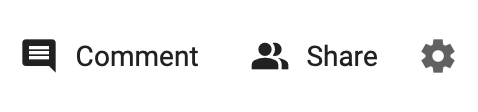

# **1. Regresión Logística sin Regularización**

In [2]:
import pandas as pd #pd solo es el alias
import os #operating system
print("Current Working Directory " , os.getcwd())
data = pd.read_csv('https://raw.githubusercontent.com/mtgca/datasets_public/main/ex2data1.txt')
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  d:\IA\Semana_4_IA


,exam1_score,exam2_score,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Extraemos las columnas de características y guardamos en la variable `X`

In [3]:
X = data[['exam1_score','exam2_score']]
X.head()

,exam1_score,exam2_score
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [4]:
y = data[['decision']]
y.head()
#type(y.shape)
#y.values.ravel()
#type(y.shape)

,decision
0,0
1,0
2,0
3,1
4,1


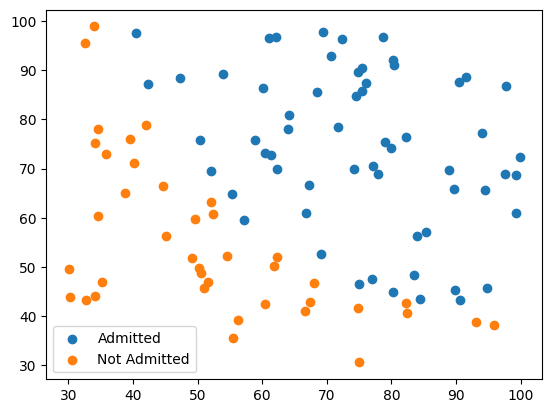

In [5]:
import matplotlib.pyplot as plt

X_admitted = X[y['decision']==1]
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')

X_Not_admitted = X[y['decision']==0]
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np # numpy~Matlab
classifier = LogisticRegression(penalty=None).fit(X, y) #penalty='none' -> sin regularización , lambda =0, representación+eval+opt
xnew = np.array([[45, 85], [99, 99]])
proba = classifier.predict_proba(xnew)
print(classifier.classes_[0], ": Not Admitted", classifier.classes_[1], ": Admitted") #Returns the log-probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
print(proba)

0 : Not Admitted 1 : Admitted
[[2.23709868e-01 7.76290132e-01]
 [2.50120417e-07 9.99999750e-01]]


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [7]:
accuracy = classifier.score(X,y) #exactitud en el conjunto de entrenamiento
print(accuracy)

0.89


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Parámetros theta sin theta_0(bias):
[[0.20623222 0.20147191]]
bias (theta_0):
[-25.16138567]


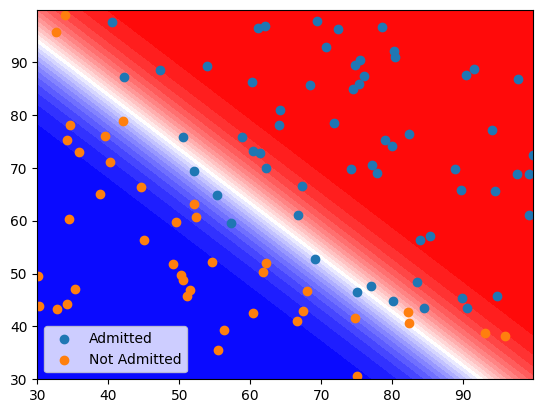

In [8]:
theta = classifier.coef_ #theta_1, theta_2, etc..
bias = classifier.intercept_ #bias-> theta_0
print('Parámetros theta sin theta_0(bias):')
print(theta) #parámetros theta (sin el bias)
print('bias (theta_0):')
print(bias)

import matplotlib.pyplot as plt

xx, yy = np.mgrid[30:100:.1, 30:100:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['decision']==1]
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')
X_Not_admitted = X[y['decision']==0]
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

# **2. Regresión Logística Regularizada**


In [9]:
import pandas as pd
import os
print("Current Working Directory " , os. getcwd())
data = pd.read_csv('https://raw.githubusercontent.com/mtgca/datasets_public/main/ex2data2.txt')
print(data.shape)
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  d:\IA\Semana_4_IA
(118, 3)


,test1,test2,QA
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [10]:
# prompt: Using dataframe data: calculate the max value

# Calculate the max value of the 'test1' column
max_value = data['test1'].max()

# Print the max value
max_value

np.float64(1.0709)

In [11]:
X = data[['test1','test2']]
print(X.shape)
X.head()

(118, 2)


,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [12]:
y = data[['QA']]
y.head()

,QA
0,1
1,1
2,1
3,1
4,1


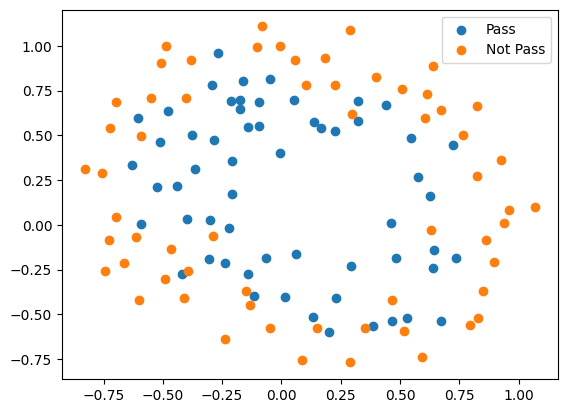

In [13]:
import matplotlib.pyplot as plt

X_admitted = X[y['QA']==1]
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')

X_Not_admitted = X[y['QA']==0]
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

In [14]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15) # x1*x2, x1*x2^2, ....x1^14*x2, degree es un hyperparameter
X_pol = poly.fit_transform(X)
print(np.shape(X_pol))


(118, 136)


In [15]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 1 #hyperparameter
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
classifier.predict_proba(poly.transform(xnew))


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[0.96756107, 0.03243893],
       [0.19642301, 0.80357699]])

In [16]:
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print(accuracy)

proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.99 #umbral
print(accuracy_score(y,ypred))

0.8305084745762712
0.5084745762711864


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


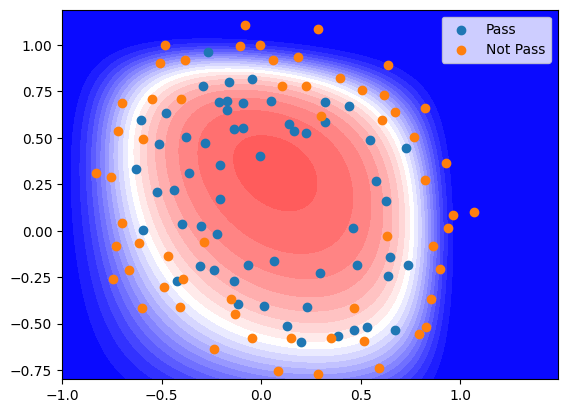

In [17]:
import matplotlib.pyplot as plt

xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1]
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0]
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()



## ✅ **Actividad 1**

En esta parte del ejercicio, podrá probar diferentes parámetros de regularización para el conjunto de datos para comprender cómo la regularización evita el sobreajuste.

Observe los cambios en la frontera de decisión a medida que varía λ. Analice
al menos los siguientes valores del parámetro de regularización, i.e., λ = 0.001,
λ =1, λ = 10, λ = 100 y discuta sus resultados en términos de la frontera de decisión obtenida y la exactitud en el conjunto de entrenamiento.
Obtenga y discuta los resultados del análisis pedido.

(118, 136)
Lambda: 100.0, Accuracy: 0.6610169491525424
0.6610169491525424
0.5084745762711864
Lambda: 10.0, Accuracy: 0.7203389830508474
0.7203389830508474
0.5084745762711864
Lambda: 1.0, Accuracy: 0.8305084745762712
0.8305084745762712
0.5084745762711864


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:140

Lambda: 0.1, Accuracy: 0.8559322033898306
0.8559322033898306
0.5084745762711864
Lambda: 0.01, Accuracy: 0.847457627118644
0.847457627118644
0.5084745762711864
Lambda: 0.001, Accuracy: 0.8813559322033898
0.8813559322033898
0.5169491525423728


d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\IA\Semana_4_IA\pcvenv\Lib\site-packages\sklearn\utils\validation.py:273

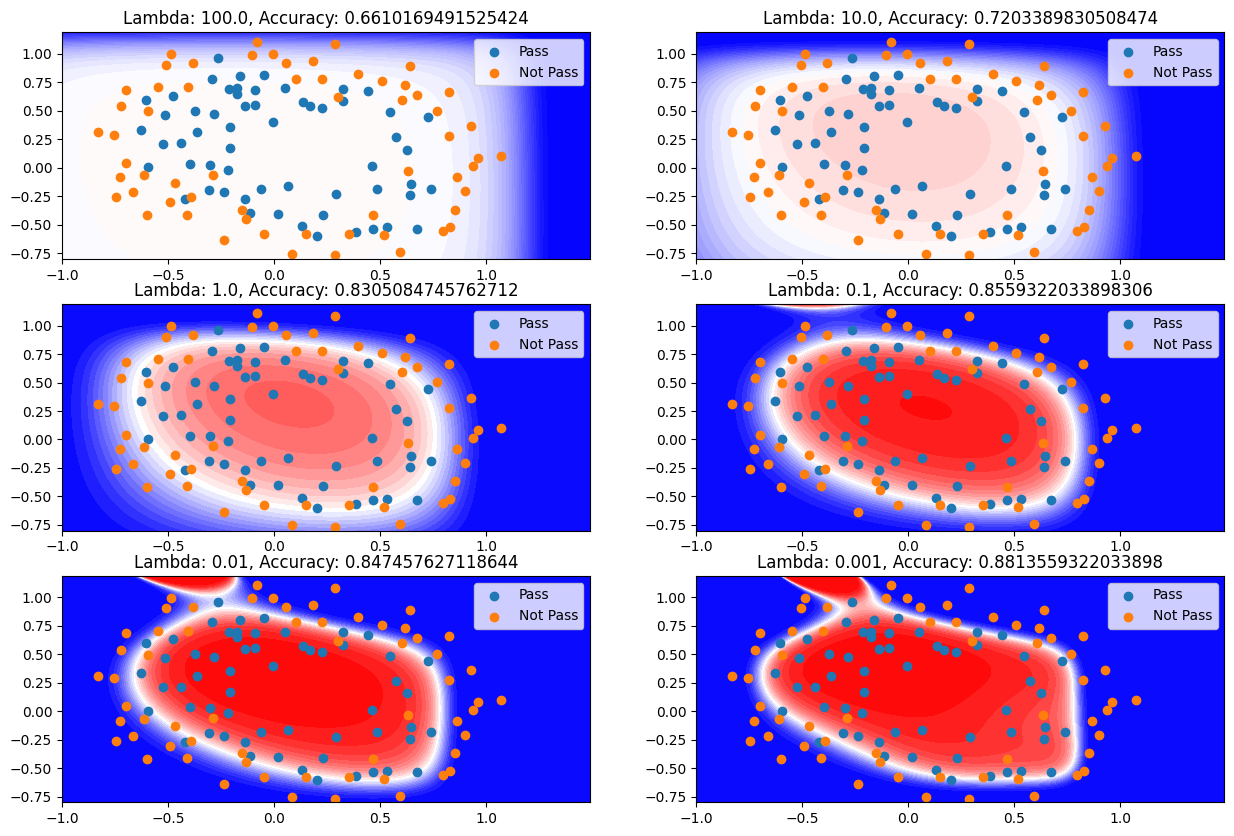

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import numpy as np

lmadas = np.array([100, 10, 1, 0.1, 0.01, 0.001])
poly = PolynomialFeatures(
    degree=15
)  # x1*x2, x1*x2^2, ....x1^14*x2, degree es un hyperparameter
X_pol = poly.fit_transform(X)
print(np.shape(X_pol))
fig , axes = plt.subplots(len(lmadas)//2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, lambda_value in enumerate(lmadas):
    classifier = LogisticRegression(
        penalty="l2", C=1 / lambda_value, max_iter=10000
    ).fit(X_pol, y)  # penalty='l2' -> con regularización
    accuracy = classifier.score(X_pol, y)  # umbral de 0.5 50%
    print(f"Lambda: {lambda_value}, Accuracy: {accuracy}")
    
    accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
    print(accuracy)
    proba = classifier.predict_proba(poly.transform(X))
    ypred = proba[:,1]>0.99 #umbral
    print(accuracy_score(y,ypred))

    xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
    axes[i].contourf(xx, yy, probs, 25, cmap="bwr",
                          vmin=0, vmax=1)
    X_admitted = X[y['QA']==1]
    axes[i].scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
    X_Not_admitted = X[y['QA']==0]
    axes[i].scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
    axes[i].set_title(f"Lambda: {lambda_value}, Accuracy: {accuracy}")
    axes[i].legend()
    


# ✅ **Conclusiones**
Concluya su trabajo con sus principales observaciones obtenidas de los resultados de sus experimentos

- Se puede observar que el gradiente de forntera disminuye considerblemente cuando el alpha es demasiado pequeño 

- Se observa que la frontera de desicion se hace mas intensa y abarca con mas precision la clasificacion 
